In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from functools import partial
from scipy import signal

In [2]:
from MyPlots import plot_DFT

## **Discrete Sinusoids**

Relembrando:

$x[n] = Acos(\omega n T +\phi) = Acos(2 \pi f n T +\phi)$

- $A:$ Amplitude.
- $\omega:$ frequência angular ($\frac{radians}{seconds}$).
- $f = (\frac{\omega}{2\pi}):$ frequência em Hertz $(\frac{cycles}{seconds})$.
- $\phi:$ Fase inicial em radianos.
- $n:$ index de tempo.
- $T = (\frac{1}{f_s}):$ período de amostragem em segundos. $(t=nT=\frac{n}{f_s})$

### **Periodicidade** 

Um sinal é periódico se e somente se  $\exists N \in \mathbb{Z}^+, x[n] = x[n + N]$:

Prova

> Definição:
  $$Acos(\omega nT + \phi) = Acos(\omega (n+N)T + \phi)$$
  Distributiva:
  $$Acos(\omega nT + \phi) = Acos(\omega nT +\omega NT + \phi)$$
  Deslocar por $2\pi$ :
  $$Acos(\omega nT + 2\pi k +\phi ) = Acos(\omega nT + \omega NT  + \phi)$$
  Então temos que ter:
  $$2\pi k = \omega NT$$
  Logo:
  $$N = \frac{2\pi k}{\omega T} = \frac{2\pi k}{2\pi f T} = \frac{2\pi k}{2\pi\frac{f}{f_s}} = \frac{f_s k}{f}$$
  Onde $k \in \mathbb{Z}$. Vamos demonstrar.


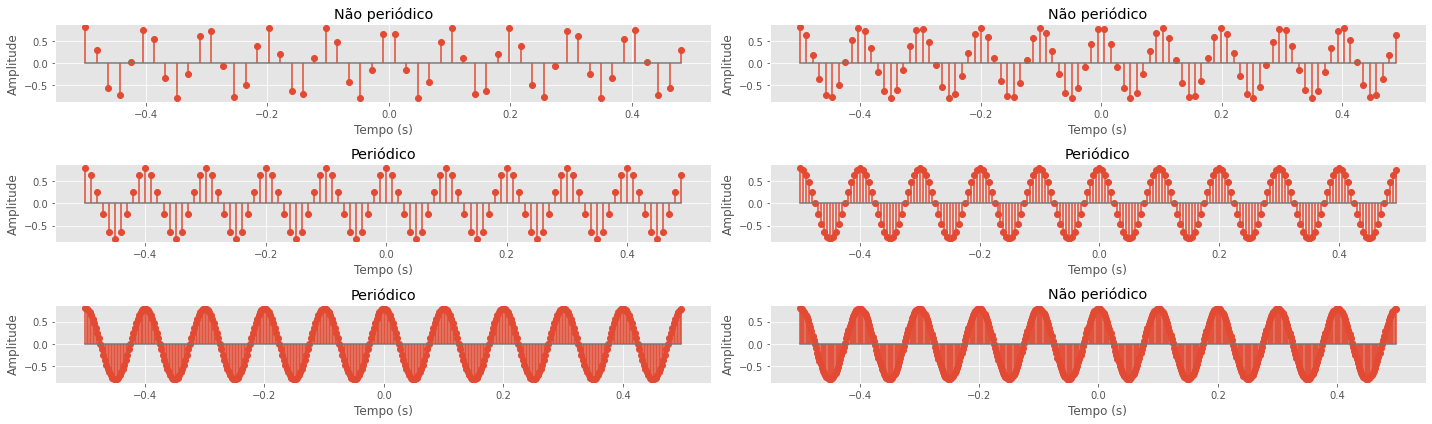

In [3]:
fig, axs = plt.subplots(3,2,figsize=(20,6))

A   = 0.8
f0  = 10
fss = np.array([53, 93, 100, 200, 400, 517])
phi = 0
isMultiple = lambda f0,fs: "Periódico" if int(fs/f0) == fs/f0 else "Não periódico"

titles = map(partial(isMultiple,f0),fss)

for ax, fs, title in zip(axs.flatten(), fss, titles):
    
    T   = 1/fs 
    t   = np.arange(-0.5,0.5, T)
    x   = A*np.cos(2*np.pi*f0*t+phi)
    ax.stem(t,x)
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Amplitude")
    ax.set_title(f"{title}")
    
plt.tight_layout()

## **Discrete Fourier Transform** 

$X[k] = \sum_{n=0}^{N-1}x[n]e^{\frac{-j2\pi kn}{N}}$, $k = 0, 1, ..., N-1$


- $X[k]:$ É o 'spectrum'.
- $N$: É o número de amostras do sinal. 
- $n:$ index discreto no tempo (tempo normalizado, T=1).
- $k:$ index discreto na frequência.
- $\omega_k = (\frac{2\pi k}{N}):$ frequência em $\frac{radianos}{segundos}$.
- $f_k = (\frac{f_s k}{N}):$ frequência em Hz ($f_s$: frequência de amostragem).

Vamos simplificar a notação utilizando a seguinte equação para as exponenciais complexas $s^*_k = e^{\frac{-j(2\pi kn)}{N}}$. Dessa forma podemos escrever a $DFT$ como um produto escalar:

$X[k] = \langle x {,} s_k\rangle = \sum_{n=0}^{N-1}x[n]s^*_k[n]$

---

**Exemplo:**
Suponha o seguinte sinal no tempo $x[n] = [1,-1,1,-1]$, com 4 amostras ($N=4$), isto é, $n=0,1,2,3$. Portante para realizar a transformada precisamos de 4 frequências ($k=0,1,2,3$). Para cada combinação amostra frequência calculamos uma exponencial complexa, da seguinte forma:

\begin{align}
    s^*_0 &= cos(\frac{2\pi 0n}{4}) - jsin(\frac{2\pi 0n}{4}) = [1,1,1,1] \\
    s^*_1 &= cos(\frac{2\pi 1n}{4}) - jsin(\frac{2\pi 1n}{4}) = [1,-j,-1,j] \\
    s^*_2 &= cos(\frac{2\pi 2n}{4}) - jsin(\frac{2\pi 2n}{4}) = [1,-1,1,-1] \\
    s^*_3 &= cos(\frac{2\pi 3n}{4}) - jsin(\frac{2\pi 3n}{4}) = [1,j,-1,-j]
\end{align}

<span style='color:purple'> <b>OBS: </span> A variável $n$ é o indice, **não** é o valor referente a $x[n]$.

Agora basta calcularmos os produtos escalares para cada frequência:

\begin{align}
\langle x {,} s^*_0\rangle &= 0 \\ 
\langle x {,} s^*_1\rangle &= 0 \\ 
\langle x {,} s^*_2\rangle &= 4 \\ 
\langle x {,} s^*_3\rangle &= 0 
\end{align}

---

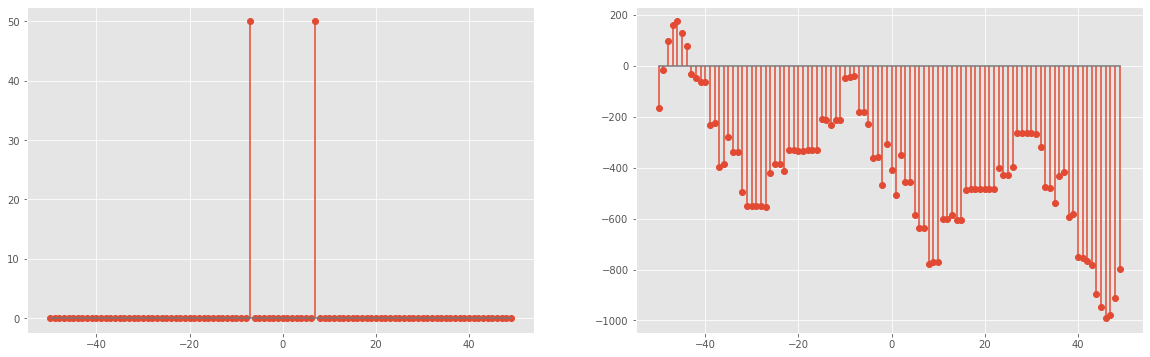

In [4]:
#Input Signal
N  = 100 # Samples
f0 = 7  #Frequência Fundamental 

# Sinal de input
x_exp  = np.exp(1j*2*np.pi*f0/N * np.arange(N))
x_sin  = np.sin(2*np.pi*f0/N    * np.arange(N))
x_cos  = np.cos(2*np.pi*f0/N    * np.arange(N))

X_k = []

ns = np.arange(-N/2, N/2)
ks = np.arange(-N/2, N/2)
    
for k in ks:
    s = np.exp(-1j*2*np.pi*k/N * ns)
    X_k.append(sum(x_cos*s))

fig, axs = plt.subplots(1,2,figsize = (20,6))

axs[0].stem(ks, np.abs(X_k))
axs[1].stem(ks, np.unwrap(np.angle(X_k,deg=True),discont=180))

plt.show()

## **Inverse Discrete Fourier Transform** 

$x[n] = \frac{1}{N}\sum_{k=0}^{N-1}X[k]e^{\frac{j 2\pi kn}{N}}$, $n = 0,1, ... , N-1$

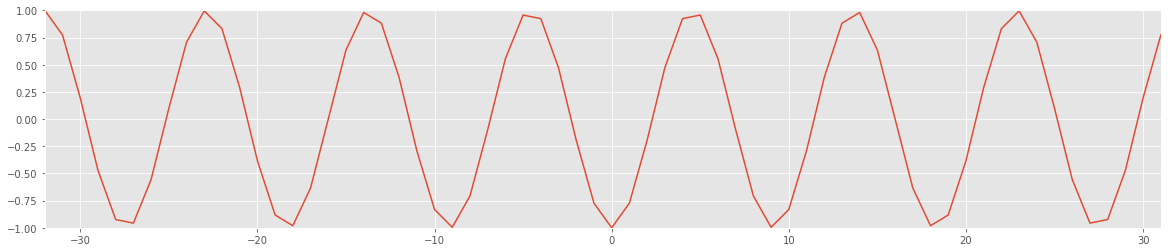

In [5]:
#Input Signal
N  = 64 # Samples
f0 = 7  #Frequência Fundamental 

x_cos  = np.cos(2 * np.pi * f0 /N * np.arange(N))
 
# X_k é do último gráfico
X_k = plot_DFT(x_cos, plot=False)

x_n = []
ns  = np.arange(-N/2,N/2)
ks  = np.arange(-N/2,N/2)

for n in ns:
    s_k = np.exp(1j * 2 * np.pi * n/N * ks)
    x_n.append(1.0/N * sum(X_k*s_k))

fig = plt.figure(figsize=(20,4))
plt.plot(ks, np.real(x_n))
plt.axis([-N/2, N/2-1,-1,1])
plt.show()

## **Fast Fourier Transform Algorithm**

### **Exemplo 1** 

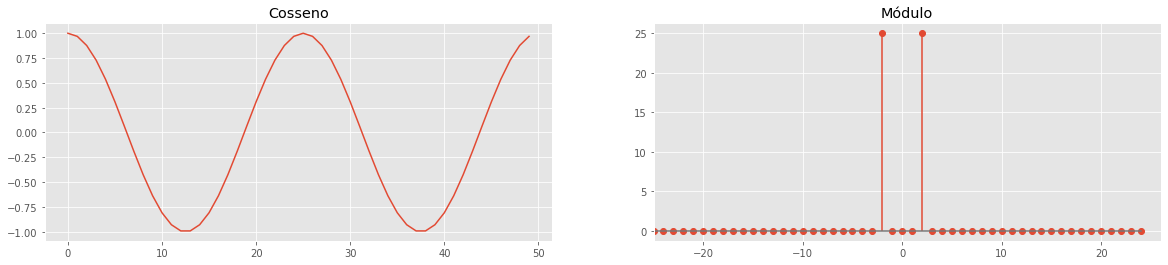

In [6]:
N  = 50 # Samples
f0 = 2  # Hz Frequência Fundamental 
x_cos  = np.cos(2*np.pi*f0/N * np.arange(N))

fig, axs = plt.subplots(1,2,figsize=(20,4))
axs[0].set_title("Cosseno")
axs[0].plot(x_cos)

X_k  = np.fft.fft(x_cos)
freq = np.fft.fftfreq(N, d=1/N)

axs[1].set_title("Módulo")

axs[1].stem(freq,np.real(X_k))
axs[1].set_xlim(-N/2,N/2+1)
plt.show()

### **Exemplo 2** 

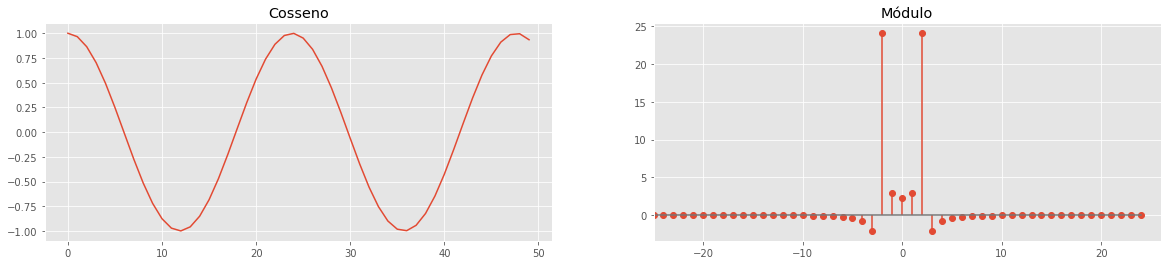

In [7]:
N  = 50 # Samples
f0 = 2.1  # Hz Frequência Fundamental 
x_cos  = np.cos(2*np.pi*f0/N * np.arange(N))

fig, axs = plt.subplots(1,2,figsize=(20,4))
axs[0].set_title("Cosseno")
axs[0].plot(x_cos)

X_k  = np.fft.fft(x_cos)
freq = np.fft.fftfreq(N, d=1/N)

axs[1].set_title("Módulo")

axs[1].stem(freq,np.real(X_k))
axs[1].set_xlim(-N/2,N/2+1)
plt.show()

## **Nyquist Aliasing**

In [57]:
#Sinal original

N  = 10000
f0 = 0.1
fs = 0.1

t  = np.linspace(0,100, N, endpoint=True)

x  = signal.square(2 * np.pi * f0 * t)
xs = x[::fs]

fig = plt.figure(figsize = (20,4))

plt.plot(t, x)
plt.scatter(t, xs)

plt.ylabel("Amplitude")
plt.xlabel("Tempo(s)")
plt.show()

TypeError: slice indices must be integers or None or have an __index__ method

In [43]:
1/f0

10.0

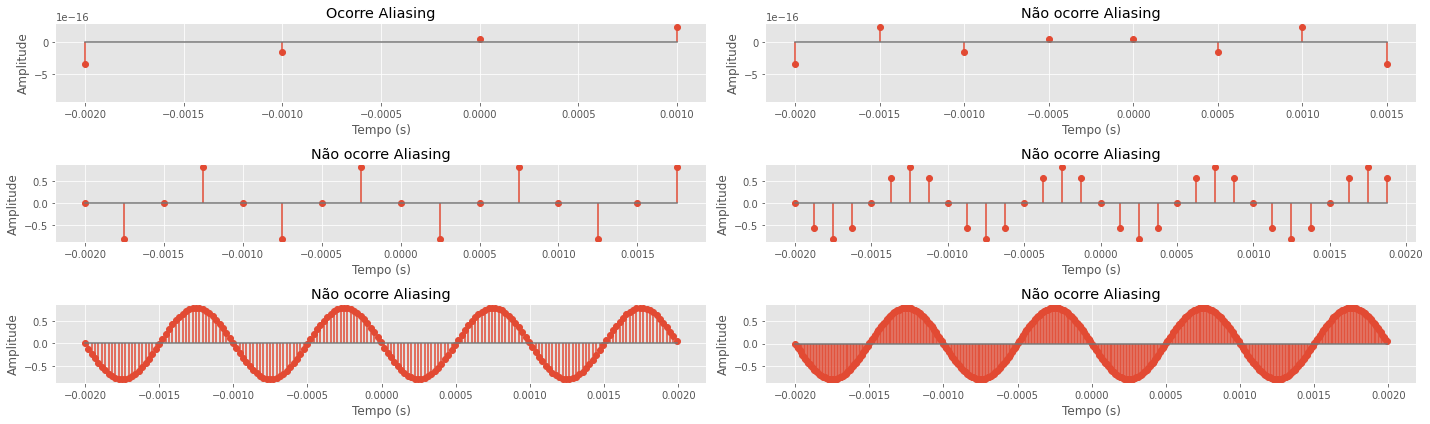

In [9]:
fig, axs = plt.subplots(3,2,figsize=(20,6))

A      = 0.8
f0     = 1000
phi    = np.pi/2
fss    = [1000, 2000, 4000, 8000, 44100, 100000]
respectNyquist = lambda f0, fs: "Não ocorre Aliasing" if fs >= 2*f0 else "Ocorre Aliasing"
titles = map(partial(respectNyquist,f0),fss)

ffts = []

for ax, fs, title in zip(axs.flatten(), fss, titles):
    
    T   = 1/fs 
    t   = np.arange(-.002,.002, T)
    x   = A*np.cos(2*np.pi*f0*t+phi)
    ffts.append(np.fft.fft(x))
    ax.stem(t,x)
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Amplitude")
    ax.set_title(f"{title}")

plt.tight_layout()
plt.show()

In [10]:
plot_idft = lambda fft: plt.plot(np.real(np.fft.ifft(fft)))

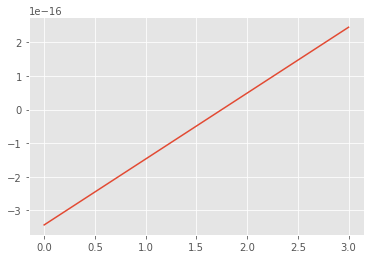

In [11]:
plot_idft(ffts[0])
plt.show()

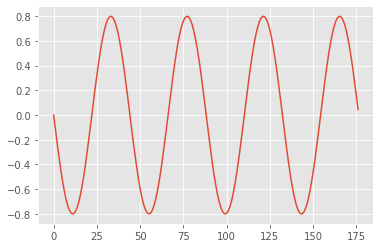

In [12]:
plot_idft(ffts[4])
plt.show()